In [ ]:
!pip install pennylane --upgrade --q
!pip install cirq --q
!pip install 'cirq-core[contrib]' --q
!pip install qiskit --q
!pip install qiskit-ibm-runtime --q
!pip install qiskit[visualization] --q

In [ ]:
import qiskit
import cirq
import pennylane as qml

SINGLE QUBIT GATE

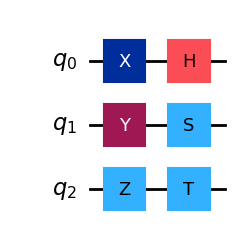

In [ ]:
qc = qiskit.QuantumCircuit(3)  # Create a Quantum Circuit with 3 Qubits.
qc.x(0)  # Apply X-gate to Qubit 0.
qc.y(1)  # Apply Y-gate to Qubit 1.
qc.z(2)  # Apply Z-gate to Qubit 2.
qc.h(0)  # Apply Hadamard-gate to Qubit 0.
qc.s(1)  # Apply S-gate to Qubit 1.
qc.t(2)  # Apply Toffoli-gate to Qubit 2.
qc.draw("mpl", style="iqp")

CIRQ IMPLEMENTATION

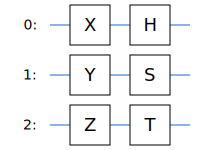

In [ ]:
from cirq.contrib.svg import SVGCircuit
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    cirq.X(q0),
    cirq.Y(q1),
    cirq.Z(q2),
    cirq.H(q0),
    cirq.S(q1),
    cirq.T(q2),
)
SVGCircuit(circuit)

PENNYLANE IMPLEMENTATION

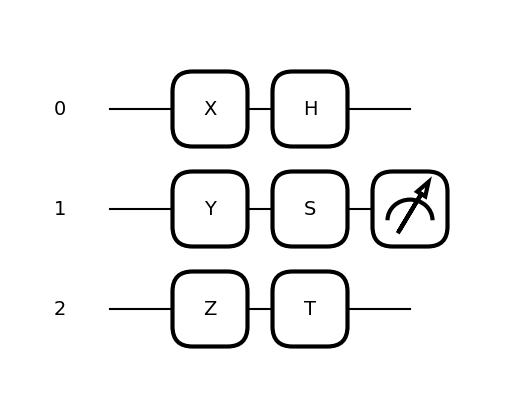

In [ ]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(x, z):
    qml.PauliX(wires=0)
    qml.PauliY(wires=1)
    qml.PauliZ(wires=2)
    qml.Hadamard(wires=0)
    qml.S(wires=1)
    qml.T(wires=2)
    return qml.expval(qml.PauliZ(1))
fig, ax = qml.draw_mpl(circuit) (1, 2)
fig.show()

MULTI QUBIT GATE

QISKIT IMPLEMENTATION

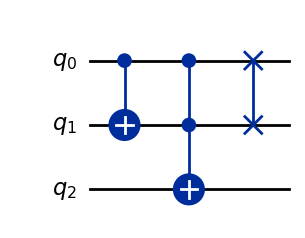

In [ ]:
qc1 = qiskit.QuantumCircuit(3)
qc1.cx(0, 1)  # CNOT with Qubit 0 as control and Qubit 1 as target.
qc1.ccx(0, 1, 2)  # Apply Toffoli-gate with Qubit 0/1 as controls and Qubit 2 as target.
qc1.swap(0, 1)  # Swap Qubit 0 and Qubit 1.
qc1.draw("mpl", style="iqp")

CIRQ IMPLEMENTATION

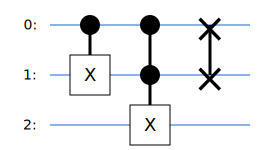

In [ ]:
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    cirq.CNOT(q0, q1),
    cirq.TOFFOLI(q0, q1, q2),
    cirq.SWAP(q0, q1),
)
SVGCircuit(circuit)

PENNYLANE IMPLEMENTATION

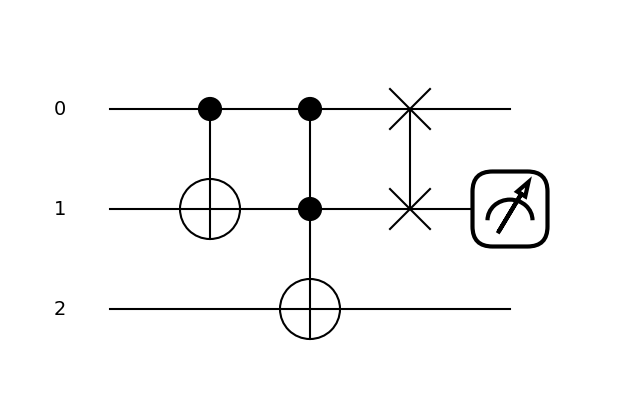

In [ ]:
dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev)
def circuit(x, z):
    qml.CNOT(wires=[0, 1])
    qml.Toffoli(wires=[0, 1, 2])
    qml.SWAP(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))
fig, ax = qml.draw_mpl(circuit) (1, 2)
fig.show()